In [1]:
from cropper import Cropper

In [2]:
from skimage.exposure import is_low_contrast

In [3]:
import cv2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import os
import PIL
from sklearn.utils import shuffle

In [5]:
cr = Cropper()

In [32]:
#image = plt.imread('./winter/00000519.jpg')
image = plt.imread('./summer/кот.jpeg')
cropped_image1 = plt.imread('./winter/000005191.jpg')
cropped_image2 = plt.imread('./winter/000005192.jpg')
cropped_image3 = plt.imread('./winter/000005193.jpg')

In [33]:
np.shape(image)

(2000, 1840, 3)

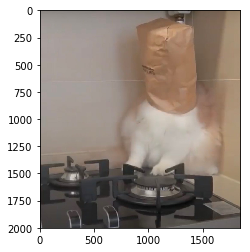

In [34]:
plt.imshow(image)

# Вот тут проверка наличия лица в кадре #

In [35]:
curr_im = image

widht = np.shape(curr_im)[1]
hight = np.shape(curr_im)[0]
print(str(widht) + 'x' + str(hight))

1840x2000


In [36]:
picture_square = widht * hight
face_cords = cr.get_face_rectangle(curr_im)

print(face_cords)

(874, -10, 629, 629)


In [37]:
point1 = (face_cords[0], face_cords[1])
point2 = (face_cords[0] + face_cords[2], face_cords[1])
point3 = (face_cords[0], face_cords[1] + face_cords[2])
point4 = (face_cords[0] + face_cords[2], face_cords[1] + face_cords[2])

In [38]:
face_points = [point1, point2, point3, point4]

list_of_unfitted_pixels_cords = []

for point in face_points:
    if point[0] >= widht or point[0] <= 0:
        list_of_unfitted_pixels_cords.append(point)
    if point[1] >= hight or point[1] <= 0:
        list_of_unfitted_pixels_cords.append(point)

In [39]:
def two_cords_square(p0, p1):
    x = 0
    y = 0
    if p0[0] == p1[0]:
        x = abs(widht - p0[0])
        y = abs(p0[1] - p1[1])
    elif p0[1] == p1[1]:
        x = abs(p0[0] - p1[0])
        y = abs(hight - p0[1])
    else:
        x = abs(p0[0] - p1[0])
        y = abs(p0[1] - p1[1])
    return x*y

diff = 0.

if len(list_of_unfitted_pixels_cords) == 2:
    p0 = list_of_unfitted_pixels_cords[0]
    p1 = list_of_unfitted_pixels_cords[1]
    diff = two_cords_square(p0, p1)

if len(list_of_unfitted_pixels_cords) == 3:
    p0 = list_of_unfitted_pixels_cords[0]
    p1 = list_of_unfitted_pixels_cords[1]
    p2 = list_of_unfitted_pixels_cords[1]
    diff += two_cords_square(p0, p1)
    diff += two_cords_square(p1, p2)
    
    twice_counted = (abs(p1[0] - widht), abs(p1[1] - hight))
    diff -= twice_counted[0] * twice_counted[1]
    
if len(list_of_unfitted_pixels_cords) == 4:
    p0 = list_of_unfitted_pixels_cords[0]
    p1 = list_of_unfitted_pixels_cords[-1]
    diff = two_cords_square(p0, p1) - picture_square

In [40]:
print(diff)
print(picture_square)
print(diff / picture_square)

1264290
3680000
0.3435570652173913


# Повернем изображение # 

In [55]:
landmarks = cr.get_mp_landmarks(curr_im)
r_center = cr.get_center_of_right_eye(landmarks)
l_center = cr.get_center_of_left_eye(landmarks)

TypeError: 'NoneType' object is not subscriptable

In [47]:
pixel_r_center = (round(r_center[0] * widht), round(r_center[1] * hight))
pixel_l_center = (round(l_center[0] * widht), round(l_center[1] * hight))

In [48]:
print(pixel_r_center)
print(pixel_l_center)

(1208, 661)
(1145, 671)


In [49]:
direction = 1
if pixel_r_center[1] < pixel_l_center[1]:
    direction = -1

In [50]:
direction

-1

In [51]:
x_pixel_distance = abs(pixel_r_center[0] - pixel_l_center[0])
y_pixel_distance = abs(pixel_r_center[1] - pixel_l_center[1])

curr_distance_between_eyes = round(np.sqrt(x_pixel_distance ** 2 + y_pixel_distance ** 2))

In [52]:
angle_cos = x_pixel_distance / curr_distance_between_eyes
print("cos(a) = ", angle_cos)

angle = np.arccos(angle_cos)
print("angle: ", angle," in radian")
 
angle = (angle * 180) / math.pi
print("angle: ", angle," in degree")

cos(a) =  0.984375
angle:  0.17700768628803093  in radian
angle:  10.141793365679865  in degree


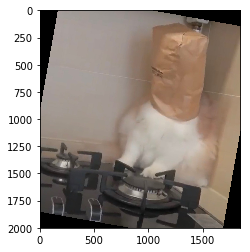

In [53]:
new_img = PIL.Image.fromarray(curr_im)
new_img = np.array(new_img.rotate(direction * angle))
plt.imshow(new_img)

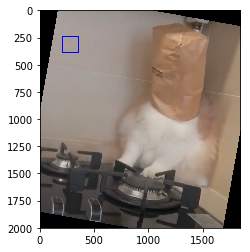

In [54]:
cv2.rectangle(new_img, (new_face_cords[0], new_face_cords[1]), (new_face_cords[0] + new_face_cords[2], new_face_cords[1] + new_face_cords[2]), color=(0,0,255), thickness=10)
plt.imshow(new_img)

# А теперь найдем отношение между расстояним между глаз и стороной квадрата от mideapipe вокруг лица #

In [30]:
new_face_cords = cr.get_face_rectangle(new_img)
print(new_face_cords)

(202, 242, 147, 147)


In [72]:
new_landmarks = cr.get_mp_landmarks(new_img)
new_r_center = cr.get_center_of_right_eye(new_landmarks)
new_l_center = cr.get_center_of_left_eye(new_landmarks)

In [73]:
final_distance_between_eyes = abs(round(new_r_center[0] * widht) - round(new_l_center[0] * widht))
final_distance_between_eyes

174

In [74]:
final_distance_between_eyes / new_face_cords[2] 

0.4009216589861751

In [619]:
39, 39,

(39, 39)

In [620]:
30 для './summer/00010623.jpg'

SyntaxError: invalid syntax (<ipython-input-620-02e701b19b1e>, line 1)

In [621]:
34 для './summer/00000182.jpg'

SyntaxError: invalid syntax (<ipython-input-621-9fe9b6299d6b>, line 1)

In [622]:
36 для './winter/00001725.jpg'

SyntaxError: invalid syntax (<ipython-input-622-9bab2f46edd7>, line 1)

In [623]:
37 для './summer/00008332.jpg'

SyntaxError: invalid syntax (<ipython-input-623-ce65dacb6570>, line 1)

In [624]:
25 для './summer/00010002.jpg'

SyntaxError: invalid syntax (<ipython-input-624-b909e490cd79>, line 1)

In [75]:
# Разрешение фотки по факту нас интересует количесвто пикселей, которые отвечают за лицо
val = cr.get_face_rectangle(image)[2]
print(str(val) + 'x' + str(val))


419x419


In [76]:
#Вот тут яркость да. Прикол в том, что в sckimage уже есть функция is_low_contrast и она в теории делает все что надо
is_low_contrast(image)

False